<!-- 
<div style="background-image: url('https://cdn.visualwilderness.com/wp-content/uploads/2019/05/Mothership-VW.jpg'); background-size: cover; background-position: center; padding: 20px; height: 500px; border-radius: 20px;">
    <h1 style="font-weight: bold; font-size: 60px; font-family: avenir; color: white; ">Flood Prediction</h1> -->


<div style="position: relative; padding: 20px; border-radius: 20px;">
    <img src="https://avatars.mds.yandex.net/i?id=28a59626e19adf2cce06fdfc0d34d16538e1c633-5276035-images-thumbs&n=13" alt="bank" style="width: 100%; height: 100%; object-fit: cover; border-radius: 20px;">
    <h1 style="position: absolute; top: 50%; left: 60%; transform: translate(-50%, -50%); font-weight: bold; font-size: 60px; font-family: avenir; color: white; "></h1>
</div>

<!-- https://gazeta-rk.ru/wp-content/uploads/2023/08/gendernye-predrassudki.jpg -->



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

# **Исследование Надежности Заёмщиков**

## **Цель Исследования**

**Определить, как различные характеристики клиента влияют на вероятность своевременного погашения кредита.**



## **Вопросы для Исследования**

1. **Влияет ли количество детей на своевременный возврат кредита?**
2. **Влияет ли семейное положение на своевременный возврат кредита?**
3. **Влияет ли уровень дохода на своевременный возврат кредита?**
4. **Влияют ли цели кредита на его своевременный возврат?**
5. **Какой алгоритм машинного обучения лучше всего подходит для предсказания вероятности возврата кредита в срок?**
6. **Как влияет балансировка классов на производительность модели?**
7. **Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной `'debt'`?**

## **Ход Исследования**

### **Входные данные**

**Файл:** `data.csv` _(статистика о платёжеспособности клиентов)._

### **Этапы Исследования**

1. **Обзор данных**
    - **Проверка на наличие ошибок.**
    - **Оценка качества данных и их влияния на исследование.**
  
2. **Предобработка данных**
    - **Исправление критичных ошибок для повышения качества данных.**
  
3. **Анализ данных и ответы на вопросы**
    - **Изучение зависимостей между характеристиками клиентов и своевременным возвратом кредита.**
    - **Оценка различных алгоритмов машинного обучения для предсказания вероятности возврата кредита в срок.**
    - **Анализ влияния балансировки классов на производительность моделей.**
    - **Определение наиболее значимых признаков для модели классификации целевой переменной `'debt'`.**
    - **Снижение размерности данных**

---

### **Этап 1: Обзор данных**

**Проведем детальный анализ данных, выявим и оценим ошибки, чтобы понять их влияние на наше исследование.**

### **Этап 2: Предобработка данных**

**Исправим наиболее критичные ошибки, чтобы гарантировать точность и надежность нашего анализа.**

### **Этап 3: Анализ данных и ответы на вопросы**

**Проанализируем данные, чтобы дать точные ответы на следующие ключевые вопросы:**

- **Количество детей:** _Влияет ли оно на своевременный возврат кредита?_
- **Семейное положение:** _Как оно влияет на способность клиента вернуть кредит вовремя?_
- **Уровень дохода:** _Есть ли корреляция между доходом и возвратом кредита в срок?_
- **Цели кредита:** _Как разные цели займа отражаются на его возврате в срок?_
- **Алгоритмы машинного обучения:** _Какой алгоритм лучше всего подходит для предсказания вероятности возврата кредита в срок?_
- **Балансировка классов:** _Как она влияет на производительность модели?_
- **Значимые признаки:** _Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной `'debt'`?_
- **Снижение размерности:** _Как можно понизить размерность данных?_

---

_Проведенное исследование улучшит модель кредитного скоринга, значительно повысив точность оценки платёжеспособности потенциальных заёмщиков, что, в свою очередь, снизит риски банка и улучшит качество предоставляемых кредитных услуг._

<div style="padding: 10px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; color: white">

    
## Импорт Библиотек

In [1]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split


# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion  # Импорт классов Pipeline и make_pipeline из scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin  # Импорт базовых классов BaseEstimator и TransformerMixin



# Rebalancing Data
from sklearn.utils import resample  

# Algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

# Validation
from sklearn.model_selection import StratifiedKFold

# Lemmatization
from pymystem3 import Mystem
from collections import Counter

# Metrics
from sklearn.metrics import (f1_score, roc_auc_score, roc_curve, precision_score, 
                            classification_report, precision_recall_curve, confusion_matrix, 
                            accuracy_score, recall_score, auc, r2_score)

# Binning
from optbinning import OptimalBinning

# Feature Reduction
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator 

# Gradient Genrator
from matplotlib.colors import LinearSegmentedColormap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

<a id='menu'></a>
    
### Структура Проекта

1. [**Обзор данных**](#first): Проведем детальный анализ данных, выявим и оценим ошибки, чтобы понять их влияние на наше исследование.
2. [**Предобработка данных**](#second): Исправим наиболее критичные ошибки, чтобы гарантировать точность и надежность нашего анализа.
   - [**Предобработка признака `children`**](#children)
   - [**Предобработка признака `days_employed`**](#days_employed)
   - [**Предобработка признака `dob_years`**](#dob_years)
   - [**Предобработка признака `education`**](#education)
   - [**Предобработка признака `family_status`**](#family_status)
   - [**Предобработка признака `gender`**](#gender)
   - [**Предобработка признака `purpose`**](#purpose)
   - [**Обработка пропущенных значений**](#miss)
   - [**Визуализация распределений признаков**](#visual)
4. [**Анализ данных и ответы на вопросы**](#third): 
   - [**Количество детей**](#fourth): Влияет ли оно на своевременный возврат кредита?
   - [**Семейное положение**](#fifth): Как оно влияет на способность клиента вернуть кредит вовремя?
   - [**Уровень дохода**](#sixth): Есть ли корреляция между доходом и возвратом кредита в срок?
   - [**Цели кредита**](#seventh): Как разные цели займа отражаются на его возврате в срок?
   - [**Балансировка классов**](#eighth): Как она влияет на производительность модели?
   - [**Алгоритмы машинного обучения**](#nineth): Какой алгоритм лучше всего подходит для предсказания вероятности возврата кредита в срок?
   - [**Значимые признаки**](#tenth): Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной `'debt'`?
   - [**Снижение размерности**](#eleventh): Как можно понизить размерность данных?
5. [**Общие выводы**](#end)


<div style="padding: 10px; width: 450px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='first'></a> **Этап 1: Обзор данных**
[**Главное меню**](#menu)

In [2]:
# Прописываем путь к файлу `data.csv`
DATAPATH = './data/data.csv'

# Read the training data into a pandas DataFrame
df = pd.read_csv(DATAPATH)

In [3]:
# Отображаем первые 5 наблюдений
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
# Printing out the column names of the dataframe.
print(df.columns)


Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
### **Описание Данных**


- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

In [5]:
# Получаем размерность DataFrame
shape = df.shape  

# Печатаем размерность DataFrame
print(shape)      


(21525, 12)


In [6]:
# Вывод общей информации о DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
# Вывод типов данных всех столбцов в DataFrame
df.dtypes


children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [8]:
# Рассчитать сумму пропущенных значений для каждого столбца и сбросить индекс, сохраняя результат в новом DataFrame под названием 'isna'
isna = df.isna().sum().reset_index(name="missing_values")

# Рассчитать процент пропущенных значений для каждого столбца и добавить его в виде нового столбца под названием 'percentage'
# в DataFrame 'isna'
isna['percentage'] = round((isna['missing_values'] / df.shape[0]) * 100, 2)

# Отсортировать DataFrame 'isna' по столбцу 'missing_values' в порядке убывания
isna.sort_values(by='missing_values', ascending=False)



,index,missing_values,percentage
1,days_employed,2174,10.1
10,total_income,2174,10.1
0,children,0,0.0
2,dob_years,0,0.0
3,education,0,0.0
4,education_id,0,0.0
5,family_status,0,0.0
6,family_status_id,0,0.0
7,gender,0,0.0
8,income_type,0,0.0


In [9]:
# Вывод статистического описания DataFrame
df.describe()


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [10]:
# Вывод статистического описания для всех столбцов типа 'object' в DataFrame
df.describe(include='object')


,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,среднее,женат / замужем,F,сотрудник,свадьба
freq,13750,12380,14236,11119,797


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
**Из данных выше, можно выявить несколько аномалий:**

1. **Количество детей (`children`)**:
   - Минимальное значение `-1.000000` является аномальным, так как количество детей не может быть отрицательным.
   - Максимальное значение `20.000000` также выглядит подозрительно высоким и может потребовать дополнительной проверки, хотя в редких случаях это возможно.

2. **Стаж работы (`days_employed`)**:
   - Минимальное значение `-18388.949901` является аномальным, так как стаж работы не может быть отрицательным.
   - Максимальное значение `401755.400475` также подозрительно высоко. Это значение примерно соответствует 1100 годам, что невозможно.
   - Есть предположение, что эти данные указаны в часах.

3. **Возраст (`dob_years`)**:
   - Минимальное значение `0.000000` указывает на аномалию, так как возраст не может быть равен нулю.
   - Среднее значение и стандартное отклонение в этом столбце выглядят нормальными, но значение 0 требует коррекции.

4. **Общий доход (`total_income`)**:
   - Минимальное значение `20667.26` и максимальное значение `2265604.00` могут быть корректными, но учитывая большое стандартное отклонение, следует провести дополнительную проверку на выбросы.


### Обобщённые шаги для обработки этих аномалий:

1. **Удаление или исправление некорректных значений**:
   - Количество детей: заменить отрицательные значения на положительные.
   - Стаж работы: заменить отрицательные значения на положительные, обработать пропуски.
   - Возраст: заменить значения `0` на медианное или удалить значение.

2. **Проверка выбросов**:
   - Провести дополнительный анализ для подтверждения или исключения подозрительно высоких значений (например, количество детей больше 10, стаж работы, общий доход больше 1 млн.).

3. **Верификация данных**:
   - Сравнить данные с известными нормативами или провести логическую проверку на основе других атрибутов (например, возраст и стаж работы).


<div style="padding: 10px; width: 500px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='second'></a>**Шаг 2. Предобработка данных**
[**Главное меню**](#menu)

In [11]:
# Подсчет количества дублирующихся и уникальных строк в DataFrame
df.duplicated().value_counts()



False    21471
True        54
Name: count, dtype: int64

In [12]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)

df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()    # проверка

0

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">

### <a id='children'></a>**Предобработка признака `children`**

[**Главное меню**](#menu)

In [13]:
# Подсчет количества уникальных значений в столбце 'children' DataFrame
df['children'].value_counts()


children
 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

In [14]:
# Применение функции для получения абсолютного значения к столбцу 'children' в DataFrame
df['children'] = df['children'].apply(lambda x: abs(x))

# Замена значений 20 в столбце 'children' на целочисленное деление на 10 для соответствия предполагаемому формату
df.loc[df['children'] == 20, 'children'] = df.loc[df['children'] == 20, 'children'] // 10

# Подсчет количества уникальных значений в столбце 'children' DataFrame после обработки
df['children'].value_counts()


children
0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='days_employed'></a>**Предобработка признака `days_employed`**

[**Главное меню**](#menu)

In [15]:
# Применение функции для получения абсолютного значения к столбцу 'days_employed' в DataFrame
df['days_employed'] = df['days_employed'].apply(lambda x: abs(x))


In [16]:
# Вывод минимального и максимального значений столбца 'days_employed' в DataFrame
print(df['days_employed'].min(), df['days_employed'].max())

# Вывод максимального значения столбца 'days_employed' после перевода его из дней в годы
print(df['days_employed'].max() // 24 // 365)


24.14163324048118 401755.40047533
45.0


In [17]:
# Округление значений столбца 'days_employed' до целых чисел, представляющих количество отработанных дней в годах
df['days_employed'] = round(df['days_employed'] / 24, 0)

# Вычисление и округление значений столбца 'years_employed', представляющих количество отработанных лет
df['years_employed'] = round(df['days_employed'] / 365, 0)


In [18]:
# Вывод первых нескольких строк DataFrame 'df' для проверки результатов изменений
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,352.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,1.0
1,1,168.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,0.0
2,0,234.0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,1.0
3,3,172.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,0.0
4,0,14178.0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,39.0


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='dob_years'></a>**Предобработка признака `dob_years`**

[**Главное меню**](#menu)

In [19]:
# Подсчет количества уникальных значений в столбце 'dob_years' DataFrame и сортировка по индексу, вывод первых строк
df['dob_years'].value_counts().sort_index().head()


dob_years
0     101
19     14
20     51
21    111
22    183
Name: count, dtype: int64

In [20]:
# Фильтрация DataFrame 'df', исключая строки, где значение столбца 'dob_years' равно 0, сброс индекса
df = df.loc[df['dob_years'] != 0].reset_index(drop=True).copy()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='education'></a>**Предобработка признака `education`**

[**Главное меню**](#menu)

In [21]:
# Подсчет количества уникальных значений в столбце 'education' DataFrame
df['education'].value_counts()


education
среднее                13646
высшее                  4678
СРЕДНЕЕ                  770
Среднее                  708
неоконченное высшее      666
ВЫСШЕЕ                   272
Высшее                   266
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: count, dtype: int64

In [22]:
# Приведение значений столбца 'education' к нижнему регистру
df['education'] = df['education'].str.lower()

# Подсчет количества уникальных значений в столбце 'education' DataFrame после приведения к нижнему регистру
df['education'].value_counts()


education
среднее                15124
высшее                  5216
неоконченное высшее      742
начальное                282
ученая степень             6
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='family_status'></a>**Предобработка признака `family_status`**

[**Главное меню**](#menu)

In [23]:
# Подсчет количества уникальных значений в столбце 'family_status' DataFrame до приведения к нижнему регистру
df['family_status'].value_counts()



family_status
женат / замужем          12295
гражданский брак          4142
Не женат / не замужем     2794
в разводе                 1185
вдовец / вдова             954
Name: count, dtype: int64

In [24]:
# Приведение значений столбца 'family_status' к нижнему регистру
df['family_status'] = df['family_status'].str.lower()

# Подсчет количества уникальных значений в столбце 'family_status' DataFrame после приведения к нижнему регистру
df['family_status'].value_counts()


family_status
женат / замужем          12295
гражданский брак          4142
не женат / не замужем     2794
в разводе                 1185
вдовец / вдова             954
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='gender'></a>**Предобработка признака `gender`**

[**Главное меню**](#menu)

In [25]:
# Вывод уникальных значений столбца 'gender' DataFrame
print(df['gender'].unique())

# Фильтрация DataFrame 'df', исключая строки, где значение столбца 'gender' равно 'XNA'
df = df.loc[df['gender'] != 'XNA']

# Подсчет количества уникальных значений в столбце 'gender' DataFrame после фильтрации
df['gender'].value_counts()


['F' 'M' 'XNA']


gender
F    14117
M     7252
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='purpose'></a>**Предобработка признака `purpose`**

[**Главное меню**](#menu)

#### **Стандартизация целей кредитования через Лемматизацию**

In [26]:
# проводим лемматизацию значений столбца с целями кредита
m = Mystem()

# с помощью контейнера Counter подсчитаем частоту упоминаний слов в тексте
Counter(m.lemmatize(' '.join(df['purpose'])))

Counter({' ': 54828,
         'недвижимость': 6329,
         'покупка': 5872,
         'жилье': 4437,
         'автомобиль': 4286,
         'образование': 3996,
         'с': 2904,
         'операция': 2593,
         'свадьба': 2321,
         'свой': 2224,
         'на': 2216,
         'строительство': 1874,
         'высокий': 1366,
         'получение': 1310,
         'коммерческий': 1307,
         'для': 1287,
         'жилой': 1225,
         'сделка': 938,
         'дополнительный': 903,
         'заниматься': 900,
         'подержать': 849,
         'проведение': 769,
         'сыграть': 764,
         'сдача': 650,
         'семья': 637,
         'собственный': 633,
         'со': 627,
         'ремонт': 605,
         'приобретение': 459,
         'профильный': 435,
         'подержанный': 113,
         '\n': 1})

In [27]:
# Применение лемматизации к столбцу 'purpose'
df['lemmas'] = df['purpose'].apply(lambda x: m.lemmatize(x))

# Функция для определения основной цели кредита
def main_purpose(row):
    if 'недвижимость' in row or 'жилье' in row:
        return 'недвижимость'
    if 'автомобиль' in row:
        return 'автомобиль' 
    if 'свадьба' in row:
        return 'свадьба'
    if 'образование' in row:
        return 'образование'
    return 'другое'

# Применение функции main_purpose к столбцу 'lemmas' для определения основной цели кредита
df['main_purpose'] = df['lemmas'].apply(main_purpose)

# Вывод количества значений по каждой основной цели кредита
print(df['main_purpose'].value_counts())

main_purpose
недвижимость    10766
автомобиль       4286
образование      3996
свадьба          2321
Name: count, dtype: int64


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='miss'></a>**Обработка пропущенных значений**

[**Главное меню**](#menu)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
    
Для обработки пропущенных значений мной были выбраны несколько стратегий:

1. **Признак - days\_employed**
   - Обучение модели на имеющихся данных с целью заполнения пропусков.

2. **Признак - years\_employed**
   - Приведение к общему виду, разделив на 365.

3. **Признак - total\_income**
   - Заполнение пропущенных значений медианными.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Обучение модели на имеющихся данных с целью заполнения пропусков в признаке `days_employed`**

In [28]:
# Фильтрация исходного DataFrame 'df' для создания X_initial, исключая строки с образованием 'ученая степень' и типами дохода 'безработный', 'в декрете', 'студент'
X_initial = df.loc[(df['education'] != 'ученая степень') & (~df['income_type'].isin(['безработный', 'в декрете', 'студент']))]

# Фильтрация X_initial для создания X, исключая строки с пропущенными значениями в столбце 'days_employed' и определенные столбцы
X = X_initial.loc[X_initial['days_employed'].notna()].drop(columns=['days_employed', 'lemmas', 'purpose',
                                                                    'total_income', 'years_employed'])

# Создание X_encoded с использованием кодирования категориальных признаков в DataFrame X
X_encoded = pd.get_dummies(X)

# Фильтрация X_initial для создания y, содержащего значения столбца 'days_employed' без пропущенных значений
y = X_initial.loc[X_initial['days_employed'].notna(), 'days_employed']

# Создание TEST путем фильтрации X_initial, исключая строки с пропущенными значениями в столбце 'days_employed' и определенные столбцы
TEST = X_initial.loc[X_initial['days_employed'].isna()].drop(columns=['days_employed', 'lemmas', 'purpose',
                                                                      'total_income', 'years_employed'])


In [29]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Определение модели LightGBM с заданными параметрами
model = LGBMRegressor(verbosity=-1)

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Вычисление коэффициента детерминации (R^2)
r2 = r2_score(y_test, y_pred)

print(f"Коэффициент детерминации (R^2): {r2:.4f}")


Коэффициент детерминации (R^2): 0.9954


In [30]:
# Создание DataFrame с важностью признаков
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).reset_index(drop=True)

# Сортировка по важности признаков
sorted_feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Нормализация важности признаков
normalized_feature_importances_df = sorted_feature_importances_df.apply(lambda x: x['Importance'] / len(X_train), axis=1)

# Создание нового DataFrame с отфильтрованными ненулевыми значениями важности признаков
normalized_feature_importances_df = pd.DataFrame({
    'Feature': sorted_feature_importances_df['Feature'],
    'Importance': normalized_feature_importances_df
}).reset_index(drop=True)

# Фильтрация признаков, исключая те, у которых важность равна нулю
resulting_features = normalized_feature_importances_df.loc[normalized_feature_importances_df['Importance'] != 0]

print(resulting_features)


                           Feature  Importance
0                        dob_years    0.107986
1                 family_status_id    0.022414
2        main_purpose_недвижимость    0.014843
3                     education_id    0.010910
4            income_type_пенсионер    0.008683
5                         gender_F    0.008312
6          main_purpose_автомобиль    0.007941
7         main_purpose_образование    0.007125
8                         children    0.007051
9                education_среднее    0.004453
10  family_status_гражданский брак    0.004305
11    family_status_вдовец / вдова    0.004008
12                            debt    0.003934
13            main_purpose_свадьба    0.002820
14         family_status_в разводе    0.002152
15           income_type_сотрудник    0.001855
16         income_type_госслужащий    0.001781
17           income_type_компаньон    0.001484
18   education_неоконченное высшее    0.000594


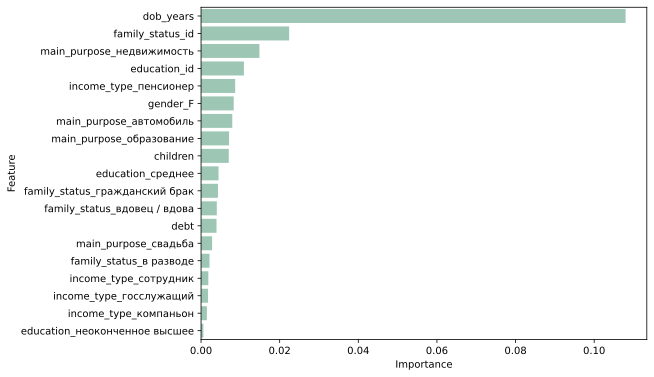

In [31]:
# Создание графика с указанным размером
plt.figure(figsize=(8, 6))

# Создание barplot с использованием данных resulting_features
ax = sns.barplot(data=resulting_features, x='Importance', y='Feature', palette=['#96ceb4'])

# Отображение графика
plt.show()

In [32]:
# Кодирование категориальных признаков в DataFrame TEST с помощью pd.get_dummies()
TEST_encoded = pd.get_dummies(TEST)

# Вывод первых нескольких строк TEST_encoded для проверки результатов кодирования
TEST_encoded.head()


,children,dob_years,education_id,family_status_id,debt,education_высшее,education_начальное,education_неоконченное высшее,education_среднее,family_status_в разводе,...,gender_M,income_type_госслужащий,income_type_компаньон,income_type_пенсионер,income_type_предприниматель,income_type_сотрудник,main_purpose_автомобиль,main_purpose_недвижимость,main_purpose_образование,main_purpose_свадьба
12,0,65,1,1,0,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
26,0,41,1,0,0,False,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
29,0,63,1,4,0,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
41,0,50,1,0,0,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
55,0,54,1,1,1,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [33]:
# Прогнозирование значений 'days_employed' с использованием обученной модели на закодированных данных TEST_encoded
y_target = model.predict(TEST_encoded)

# Замена соответствующих значений 'days_employed' в исходном DataFrame df на предсказанные значения
df.loc[TEST.index, 'days_employed'] = y_target


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Заполнение пропусков в признаке `years_employed`**

In [34]:
# Вычисление и присвоение значений 'years_employed' в исходном DataFrame df для строк, находящихся в TEST.index,
# путем деления значений 'days_employed' на 365 и округления до целых чисел
df.loc[TEST.index, 'years_employed'] = df.loc[TEST.index, 'days_employed'] // 365


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Заполнение пропусков в признаке `total_income`**

In [35]:
# Заполнение пропущенных значений в столбце 'total_income' исходным медианным значением
df['total_income'].fillna(df['total_income'].median(), inplace=True)


In [36]:
# Подсчет количества пропущенных значений в каждом столбце DataFrame df
df.isna().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
lemmas              0
main_purpose        0
dtype: int64

In [37]:
# Преобразование столбца 'years_employed' в тип данных int в DataFrame df
df['years_employed'] = df['years_employed'].astype(int)


In [38]:
# Получение уникальных комбинаций столбцов 'family_status_id' и 'family_status', исключая дубликаты, и сброс индекса
df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [39]:
# Получение уникальных комбинаций столбцов 'education_id' и 'education', исключая дубликаты, и сброс индекса
df[['education_id', 'education']].drop_duplicates().reset_index(drop=True)


,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [40]:
BASE_FEATURES = ['children', 'days_employed', 'dob_years', 'education', 'education_id', 'family_status',
                 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose']

CATEGORICAL_FEATURES = ['education', 'family_status', 'income_type', 'main_purpose', 'gender']

NUMERIC_FEATURES = ['children', 'years_employed', 'dob_years', 'total_income']

TARGET_FEATURE = 'debt'

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='visual'></a> Визуализация распределений признаков.

[**Главное меню**](#menu)

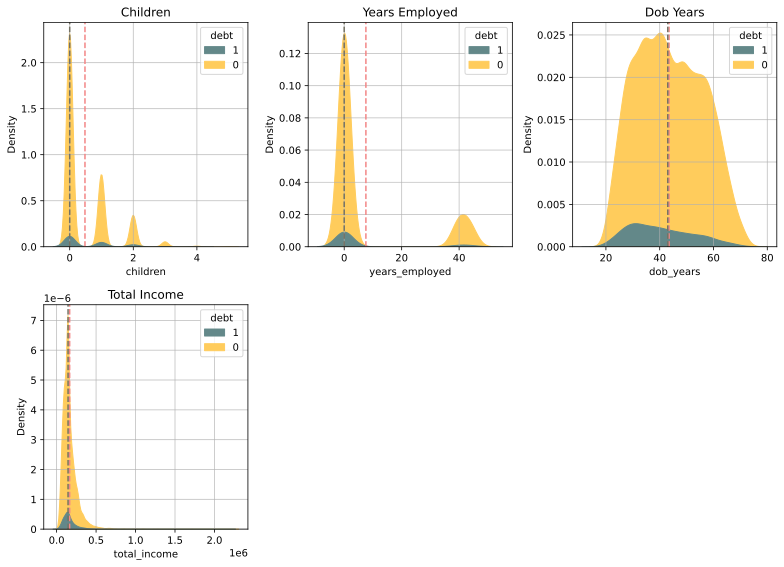

In [41]:
# Выбор числовых признаков и целевого признака
selected_columns = NUMERIC_FEATURES + [TARGET_FEATURE]

# Создание DataFrame numerics, содержащего только выбранные столбцы
numerics = df[selected_columns]

# Вычисление количества графиков, столбцов и строк для отображения
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Создание графика с заданным размером
plt.figure(figsize=(11, 4 * num_rows))

# Построение графиков для каждого столбца из numerics, исключая 'debt'
for i, col in enumerate(numerics.drop(columns=['debt']), 1):
    target_counts = numerics['debt'].value_counts()
    hue_order = reversed(target_counts.index)
    
    plt.subplot(num_rows, num_columns, i)  # Создание subplot
    mean_value = numerics[col].mean()
    median_value = numerics[col].median()

    sns.kdeplot(data=numerics, x=col, fill=True, hue='debt', palette=['#638889', '#ffcc5c', '#f28585'], alpha=1, hue_order=hue_order)

    plt.axvline(x=mean_value, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median_value, color='#747264', linestyle='--', label='Median')

    plt.grid(True, alpha=0.8)  # Добавление сетки на график
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))}')  # Установка заголовка

plt.tight_layout()  # Оптимизация расположения subplot
plt.show()  # Отображение графика


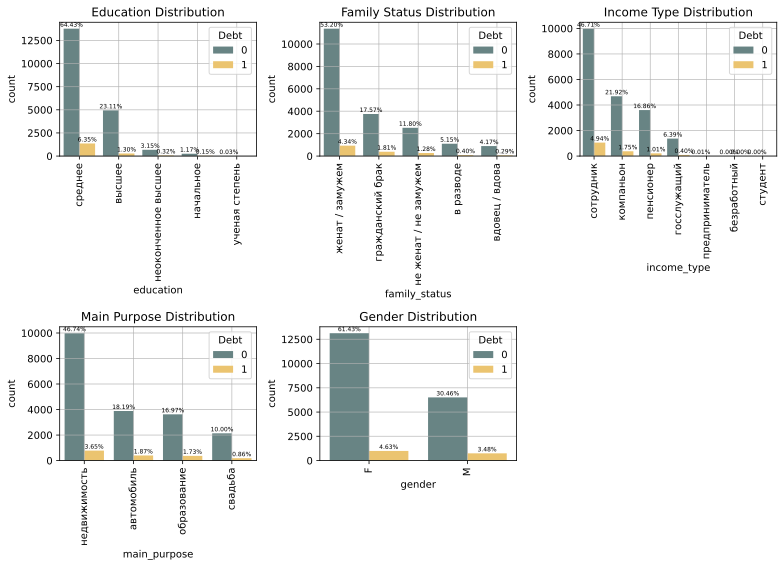

In [42]:
# Выбор категориальных признаков и целевого признака
selected_columns = CATEGORICAL_FEATURES + [TARGET_FEATURE]

# Создание DataFrame cat_features, содержащего только выбранные столбцы
cat_features = df[selected_columns]

# Вычисление количества графиков, столбцов и строк для отображения
num_plots = len(cat_features.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Создание графика с заданным размером
plt.figure(figsize=(11, 4 * num_rows))

# Построение графиков для каждого категориального признака из cat_features, исключая 'debt'
for i, col in enumerate(cat_features.drop(columns='debt'), 1):
    plt.subplot(num_rows, num_columns, i)  # Создание subplot
    
    # Определение порядка категорий на основе частоты появления для каждого значения 'debt'
    cat_order = cat_features.groupby('debt', as_index=False)[col].value_counts()
    order = cat_order.loc[cat_order['debt'] == 0, col].values.tolist()
    
    # Построение countplot для текущего категориального признака
    ax = sns.countplot(data=cat_features, x=col, palette=['#638889', '#ffcc5c', '#f28585'], hue='debt', alpha=1, order=order)
    
    total = float(len(df))
    
    # Добавление процентных значений к каждому столбцу countplot
    for p in ax.patches:
        percentage = (p.get_height() / total) * 100
        if percentage > 0:
            percentage_label = '{:.2f}%'.format(percentage)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(0, 2), ha='center', fontsize=6)
        
    plt.grid(True, alpha=0.8)  # Добавление сетки на график
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Установка заголовка
    
    # Добавление легенды с подписями 'Debt'
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Debt')

    plt.xticks(rotation=90)  # Поворот подписей по оси X для улучшения читаемости

plt.tight_layout()  # Оптимизация расположения subplot
plt.show()  # Отображение графика
 

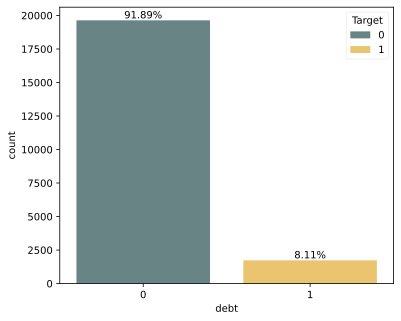

In [43]:
# Создание графика с заданным размером
plt.figure(figsize=(6, 5))

# Построение countplot для столбца 'debt'
ax = sns.countplot(data=df, x='debt', hue='debt', palette=['#638889', '#ffcc5c', '#f28585'], alpha=1)

total = float(len(df))

# Добавление процентных значений над столбцами countplot
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    if percentage > 0:
        percentage_label = '{:.2f}%'.format(percentage)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(0, 2), ha='center', fontsize=10)

# Добавление легенды с подписями 'Target' и установка прозрачности рамки
h, labels = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Target", framealpha=0.3, loc="upper right")

plt.show()  # Отображение графика


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Разделим на категории признаки `dob_years` и `total_income`**

In [44]:
# Функция для оптимального биннинга числового признака с использованием OptimalBinning
def opt_bin_transform(df, x, y):
    optb = OptimalBinning(name=x, dtype='numerical', solver='cp')
    optb.fit(df[x].values, y)
    binning_table = optb.binning_table
    return optb.transform(df[x], metric="bins"), binning_table

# Применение оптимального биннинга к столбцу 'dob_years' и сохранение результатов в новом столбце 'age_categories'
df['age_categories'], binning_table_age = opt_bin_transform(df.drop(columns='debt'), 'dob_years', df['debt'].values)

In [45]:
# Функция для оптимального биннинга числового признака с использованием OptimalBinning
def reg_opt_bin_transform(df, x, y):
    optb = OptimalBinning(name=x, dtype='numerical', solver='cp', problem_type='regression')
    optb.fit(df[x].values, y)
    binning_table = optb.binning_table
    return optb.transform(df[x], metric="bins"), binning_table
    

# Применение оптимального биннинга к столбцу 'total_income' и сохранение результатов в новом столбце 'total_income_categories'
df['total_income_categories'], binning_table_income = opt_bin_transform(df.drop(columns='debt'), 'total_income', df['debt'].values)

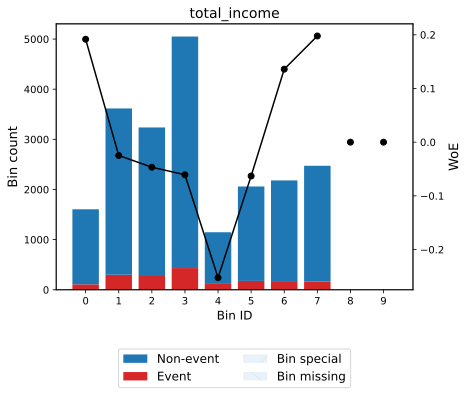

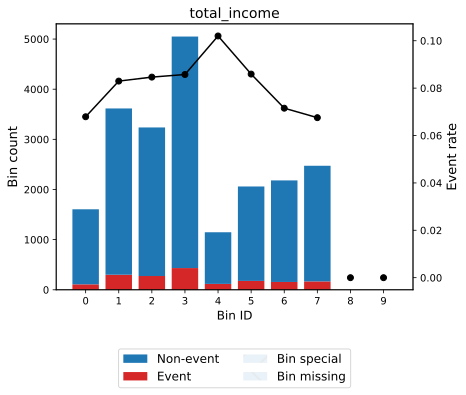

In [46]:
# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_income = binning_table_income.build()

# Визуализируем таблицу биннинга, используя метрику "WOE" (Weight of Evidence)`
binning_table_income.plot(metric="woe")

# Визуализируем таблицу биннинга, используя метрику "event_rate" (частота событий)`
binning_table_income.plot(metric="event_rate")

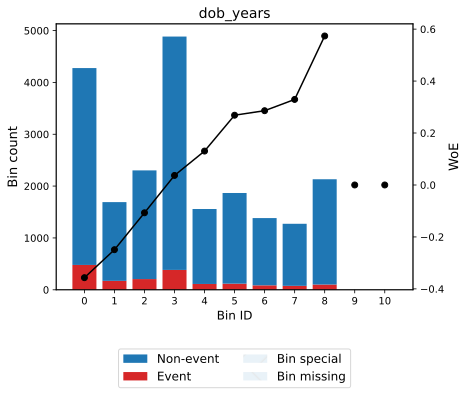

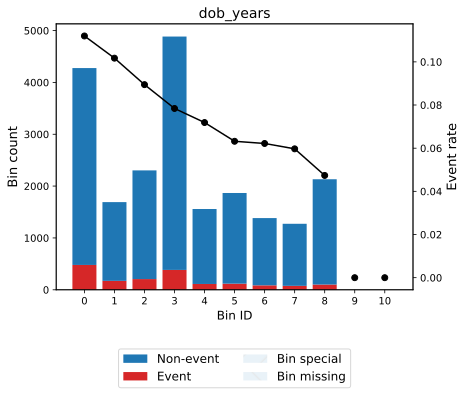

In [47]:
# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_age = binning_table_age.build()

# Визуализируем таблицу биннинга, используя метрику "WOE" (Weight of Evidence)`
binning_table_age.plot(metric="woe")

# Визуализируем таблицу биннинга, используя метрику "event_rate" (частота событий)`
binning_table_age.plot(metric="event_rate")

In [48]:
# Определяем тип таблицы биннинга`
type(binning_table_age)

# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_age = binning_table_age.build()

# Выводим оптимальное биннинг-решение`
optimal_binning_age

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 31.50)",4277,0.200150,3798,479,0.111994,-0.356981,0.029622,0.003683
1,"[31.50, 34.50)",1691,0.079133,1519,172,0.101715,-0.249198,0.005455,0.000680
2,"[34.50, 38.50)",2303,0.107773,2097,206,0.089449,-0.107124,0.001294,0.000162
3,"[38.50, 47.50)",4885,0.228602,4502,383,0.078403,0.036731,0.000304,0.000038
4,"[47.50, 50.50)",1558,0.072909,1446,112,0.071887,0.130547,0.001177,0.000147
5,"[50.50, 54.50)",1867,0.087370,1749,118,0.063203,0.268604,0.005636,0.000702
6,"[54.50, 57.50)",1383,0.064720,1297,86,0.062184,0.285951,0.004697,0.000585
7,"[57.50, 60.50)",1273,0.059572,1197,76,0.059701,0.32933,0.005633,0.000701
8,"[60.50, inf)",2132,0.099771,2031,101,0.047373,0.573652,0.025902,0.003194
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [49]:
# Определяем тип таблицы биннинга`
type(binning_table_income)

# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_income = binning_table_income.build()

# Выводим оптимальное биннинг-решение`
optimal_binning_income

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 71770.20)",1605,0.075109,1496,109,0.067913,0.191692,0.002548,0.000318
1,"[71770.20, 106567.24)",3616,0.169217,3316,300,0.082965,-0.024779,0.000105,0.000013
2,"[106567.24, 134641.38)",3237,0.151481,2963,274,0.084646,-0.046681,0.000337,0.000042
3,"[134641.38, 163022.48)",5050,0.236324,4617,433,0.085743,-0.060748,0.000895,0.000112
4,"[163022.48, 175300.38)",1147,0.053676,1030,117,0.102005,-0.25237,0.003800,0.000474
5,"[175300.38, 206116.72)",2060,0.096401,1883,177,0.085922,-0.063039,0.000393,0.000049
6,"[206116.72, 259213.46)",2181,0.102064,2025,156,0.071527,0.135958,0.001782,0.000223
7,"[259213.46, inf)",2473,0.115728,2306,167,0.067529,0.197765,0.004167,0.000520
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [50]:
# Выбор возрастных интервалов из DataFrame optimal_binning_age, исключая значения 'Special', 'Missing', ''
age_bins = optimal_binning_age.loc[~optimal_binning_age['Bin'].isin(['Special', 'Missing', '']), 'Bin']

# Создание словаря для отображения интервалов в целые числа
interval_to_int = dict(zip(age_bins, range(1, len(age_bins) + 1)))

# Применение отображения interval_to_int к столбцу 'age_categories' в DataFrame df
df['age_categories'] = df['age_categories'].map(interval_to_int)

# Вывод словаря interval_to_int
interval_to_int


{'(-inf, 31.50)': 1,
 '[31.50, 34.50)': 2,
 '[34.50, 38.50)': 3,
 '[38.50, 47.50)': 4,
 '[47.50, 50.50)': 5,
 '[50.50, 54.50)': 6,
 '[54.50, 57.50)': 7,
 '[57.50, 60.50)': 8,
 '[60.50, inf)': 9}

In [51]:
# Создаем словарь маппинга
# Выбор категорий дохода из DataFrame optimal_binning_income, исключая значения 'Special', 'Missing', ''
income_bins = optimal_binning_income.loc[~optimal_binning_income['Bin'].isin(['Special', 'Missing', '']), 'Bin']

# Создание словаря для отображения интервалов дохода в категории на основе буквенного представления
interval_to_income_cat = dict(zip(income_bins, [chr(65 + idx) for idx in range(len(income_bins))]))

# Применение отображения interval_to_income_cat к столбцу 'total_income_categories' в DataFrame df
df['total_income_categories'] = df['total_income_categories'].map(interval_to_income_cat)

# Вывод словаря interval_to_income_cat
interval_to_income_cat


{'(-inf, 71770.20)': 'A',
 '[71770.20, 106567.24)': 'B',
 '[106567.24, 134641.38)': 'C',
 '[134641.38, 163022.48)': 'D',
 '[163022.48, 175300.38)': 'E',
 '[175300.38, 206116.72)': 'F',
 '[206116.72, 259213.46)': 'G',
 '[259213.46, inf)': 'H'}

<div style="padding: 10px; width: 680px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='third'></a>**Этап 3: Анализ данных и ответы на вопросы**
[**Главное меню**](#menu)



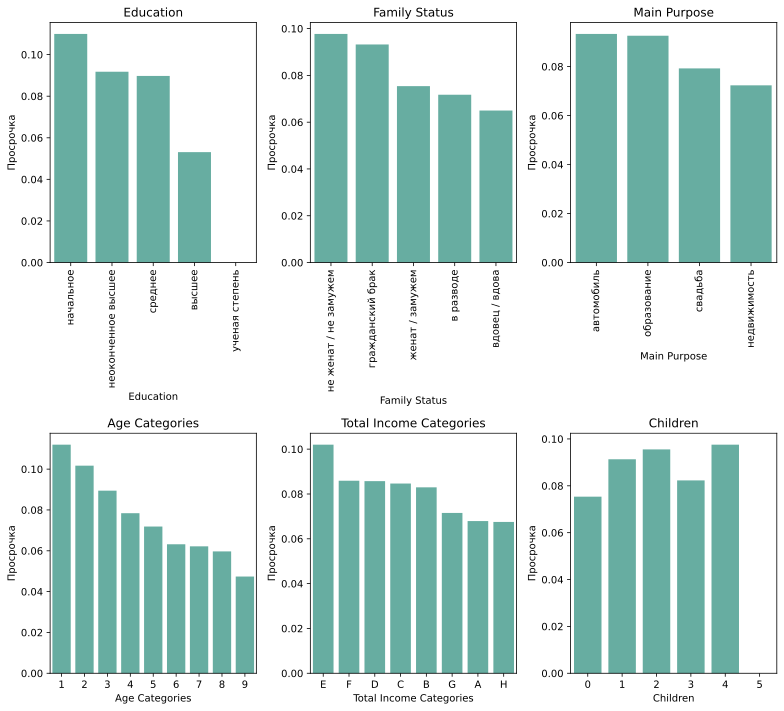

In [52]:

# Определение списка признаков для построения графиков и добавление целевого признака
PLOT_FEATURES = ['education', 'family_status', 'main_purpose', 'age_categories', 'total_income_categories', 'children']
selected_columns = PLOT_FEATURES + ['debt']

# Создание DataFrame numerics, содержащего только выбранные столбцы
numerics = df[selected_columns]

# Вычисление количества графиков, столбцов и строк для отображения
num_plots = len(PLOT_FEATURES)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Создание графиков с заданным размером и распределением subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(11, 5 * num_rows))

# Обработка случая, когда num_rows равно 1
if num_rows == 1:
    axes = [axes]

# Построение графиков для каждого признака из PLOT_FEATURES
for i, col in enumerate(PLOT_FEATURES):
    row, column = divmod(i, num_columns)
    ax = axes[row][column] if num_rows > 1 else axes[column]

    # Группировка данных по признаку и целевому признаку для вычисления процентного распределения
    grouped = df.groupby([col, 'debt']).size().unstack(fill_value=0)
    total_counts = df.groupby(col).size()
    percentage = grouped.div(total_counts, axis=0)

    # Подготовка данных для построения barplot
    pivot_table = percentage.reset_index()
    pivot_table_visual = pivot_table.sort_values(by=1, ascending=False)

    # Построение barplot
    sns.barplot(data=pivot_table_visual, x=col, y=1, palette=['#5bb9a9'], alpha=1, ax=ax)

    # Настройка заголовка и подписей осей
    ax.set_title(f'{" ".join(list(map(str.title, col.split("_"))))}')
    ax.set_ylabel('Просрочка')
    ax.set_xlabel(col.replace('_', ' ').title())

    # Определение угла поворота подписей по оси X
    max_xlabel_length = max([len(str(item.get_text())) for item in ax.get_xticklabels()])
    rotation_angle = 0 if max_xlabel_length < 3 else 90
    ax.tick_params(axis='x', rotation=rotation_angle)

plt.tight_layout()  # Оптимизация расположения subplot
plt.show()  # Отображение графиков



<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">


### <a id='fourth'></a> Вопрос 1:
### Есть ли зависимость между количеством детей и возвратом кредита в срок?

[**Главное меню**](#menu)



In [53]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['children', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('children').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_chld = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
pivot_table_chld.reset_index(drop=True)


debt,children,0,1
0,4,0.902439,0.097561
1,2,0.904447,0.095553
2,1,0.908678,0.091322
3,3,0.917683,0.082317
4,0,0.924628,0.075372
5,5,1.000000,0.000000


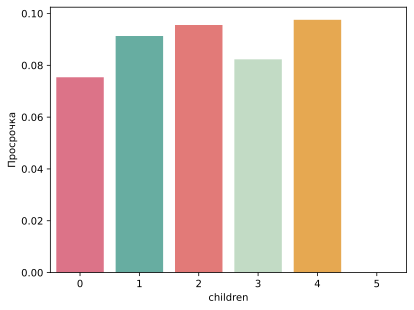

In [54]:
# Построение barplot на основе данных из DataFrame pivot_table_chld
sns.barplot(data=pivot_table_chld, x='children', y=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси Y
plt.ylabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
Анализируя предоставленные данные, можно сделать выводы о зависимости между количеством детей и возвратом кредита в срок. В таблице представлено распределение заемщиков по количеству детей и вероятность возврата кредита (0 - возврат, 1 - не возврат).

Таблица:

| Debt | Children | Return (%) | Not Return (%) |
|------|----------|------------|---------------|
| 0    | 4        | 0.902439   | 0.097561      |
| 1    | 2        | 0.904447   | 0.095553      |
| 2    | 1        | 0.908678   | 0.091322      |
| 3    | 3        | 0.917683   | 0.082317      |
| 4    | 0        | 0.924628   | 0.075372      |
| 5    | 5        | 1.000000   | 0.000000      |

### Выводы:
1. **Общая тенденция**: В целом, с увеличением количества детей, вероятность возврата кредита в срок (Return (%)) несколько уменьшается, хотя это изменение незначительно.
   
2. **Особые случаи**:
   - **5 детей**: Исключительный случай, когда все заемщики с 5 детьми вернули кредит (100% возврата, 0% не возврата). Это может быть выбросом или аномалией из-за малого размера выборки.
   - **Без детей**: Заемщики без детей имеют самую высокую вероятность возврата кредита (92.46%).

3. **Наибольшая вероятность невозврата**:
   - Заемщики с 4 детьми имеют наибольшую вероятность невозврата кредита (9.76%), что немного выше по сравнению с другими категориями.

### Заключение:
Можно сделать осторожный вывод, что наличие большего количества детей может незначительно увеличивать вероятность невозврата кредита, за исключением случая с 5 детьми, где все заемщики вернули кредит. Однако для более точного анализа необходима дополнительная информация о размере выборок и других возможных факторах, влияющих на возврат кредита.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">


### <a id='fifth'></a>Вопрос 2:

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

[**Главное меню**](#menu)

In [55]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['family_status', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('family_status').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_family_status = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
pivot_table_family_status.reset_index(drop=True)


debt,family_status,0,1
0,не женат / не замужем,0.902291,0.097709
1,гражданский брак,0.906786,0.093214
2,женат / замужем,0.924603,0.075397
3,в разводе,0.928270,0.071730
4,вдовец / вдова,0.935010,0.064990


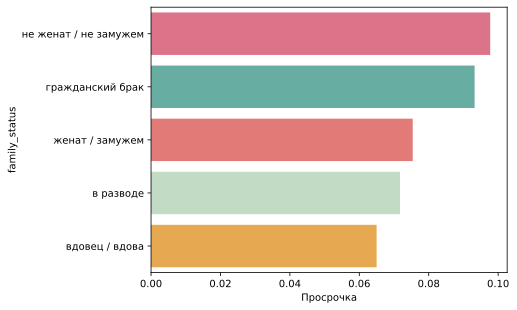

In [56]:
# Построение barplot на основе данных из DataFrame pivot_table_family_status
sns.barplot(data=pivot_table_family_status, y='family_status', x=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси X
plt.xlabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">


Анализируя предоставленные данные, можно сделать выводы о зависимости между количеством детей и возвратом кредита в срок. В таблице представлено распределение заемщиков по количеству детей и процент возврата и невозврата кредита для различных категорий количества детей. (0 - возврат, 1 - не возврат).


Таблица:

| Debt | Family Status             | Return (%) | Not Return (%) |
|------|---------------------------|------------|----------------|
| 0    | не женат / не замужем     | 90.2291    | 9.7709         |
| 1    | гражданский брак          | 90.6786    | 9.3214         |
| 2    | женат / замужем           | 92.4603    | 7.5397         |
| 3    | в разводе                 | 92.8270    | 7.1730         |
| 4    | вдовец / вдова            | 93.5010    | 6.4990         |

### Выводы:
1. **Общая тенденция**: Процент возврата кредита выше у тех, кто состоит в браке (официальном или гражданском), а также у вдовцов и разведенных, по сравнению с неженатыми/незамужними.

2. **Наибольший процент возврата кредита**:
   - Вдовцы/вдовы имеют самый высокий процент возврата кредита (93.50%).

3. **Наибольший процент невозврата кредита**:
   - Неженатые/незамужние заемщики имеют самый высокий процент невозврата кредита (9.77%).

4. **Гражданский брак и официально женатые**:
   - Заемщики в гражданском браке и официально женатые/замужние имеют сравнительно высокие проценты возврата кредита: 90.68% и 92.46% соответственно.

### Заключение:
Семейное положение оказывает значительное влияние на возврат кредита. Вдовцы и вдовы, а также люди, состоящие в браке (официальном или гражданском), и разведенные имеют более высокие проценты возврата кредита по сравнению с неженатыми/незамужними заемщиками. Наибольший риск невозврата кредита наблюдается у неженатых/незамужних заемщиков.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='sixth'></a>Вопрос 3:

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

[**Главное меню**](#menu)

In [57]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['total_income_categories', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('total_income_categories').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_income = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
income_cats_pivot = pivot_table_income.reset_index(drop=True)


In [58]:
income_cats_pivot

debt,total_income_categories,0,1
0,E,0.897995,0.102005
1,F,0.914078,0.085922
2,D,0.914257,0.085743
3,C,0.915354,0.084646
4,B,0.917035,0.082965
5,G,0.928473,0.071527
6,A,0.932087,0.067913
7,H,0.932471,0.067529


In [59]:
def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None


In [60]:
# Применение функции get_key_from_value к столбцу 'total_income_categories' для получения соответствующих ключей
income_cats_pivot['mapping'] = income_cats_pivot['total_income_categories'].apply(lambda x: get_key_from_value(interval_to_income_cat, x))

# Вычисление количества значений 'total_income_categories' и сохранение в новый столбец 'counts'
income_cats_quantity = df.groupby('total_income_categories')['total_income_categories'].count()
income_cats_pivot['counts'] = income_cats_pivot['total_income_categories'].map(income_cats_quantity)

# Вывод DataFrame income_cats_pivot с добавленными столбцами 'mapping' и 'counts'
income_cats_pivot


debt,total_income_categories,0,1,mapping,counts
0,E,0.897995,0.102005,"[163022.48, 175300.38)",1147
1,F,0.914078,0.085922,"[175300.38, 206116.72)",2060
2,D,0.914257,0.085743,"[134641.38, 163022.48)",5050
3,C,0.915354,0.084646,"[106567.24, 134641.38)",3237
4,B,0.917035,0.082965,"[71770.20, 106567.24)",3616
5,G,0.928473,0.071527,"[206116.72, 259213.46)",2181
6,A,0.932087,0.067913,"(-inf, 71770.20)",1605
7,H,0.932471,0.067529,"[259213.46, inf)",2473


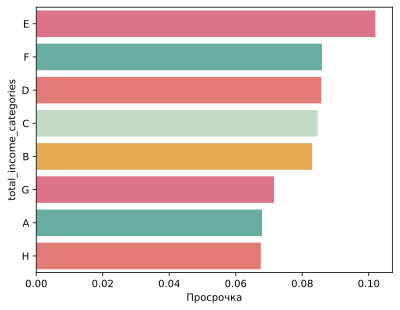

In [61]:
# Построение barplot на основе данных из DataFrame pivot_table_income
sns.barplot(data=pivot_table_income, y='total_income_categories', x=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси X
plt.xlabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">

Проанализировав данные, можно сделать выводы о зависимости между количеством уровнем дохода и возвратом кредита в срок. В таблице представлено распределение заемщиков по уровню дохода и процент возврата и невозврата кредита для различных категорий заемщиков. (0 - возврат, 1 - не возврат).

Таблица:

| Debt | Total Income Category | Return (%) | Not Return (%) | Income Interval Description                  |
|------|-----------------------|------------|----------------|---------------------------------------------|
| 0    | A                     | 0.932087   | 0.067913       | от 0 до 71770.20                            |
| 1    | B                     | 0.917035   | 0.082965       | от 71770.20 до 106567.24                    |
| 2    | C                     | 0.915354   | 0.084646       | от 106567.24 до 134641.38                   |
| 3    | D                     | 0.914257   | 0.085743       | от 134641.38 до 163022.48                   |
| 4    | E                     | 0.897995   | 0.102005       | от 163022.48 до 175300.38                   |
| 5    | F                     | 0.914078   | 0.085922       | от 175300.38 до 206116.72                   |
| 6    | G                     | 0.928473   | 0.071527       | от 206116.72 до 259213.46                   |
| 7    | H                     | 0.932471   | 0.067529       | от 259213.46 и выше                         |

### Выводы:
1. **Общая тенденция**: С увеличением уровня дохода заемщиков растет вероятность возврата кредита в срок.

2. **Наибольшая вероятность возврата кредита**:
   - Заемщики с наименьшим уровнем дохода (категория A) демонстрируют высокий процент возврата кредита (93.21%), что является вторым по величине после заемщиков с наивысшим доходом (категория H) .

3. **Наибольший процент невозврата кредита**:
   - Наихудший процент возврата кредита наблюдается у заемщиков с категорией дохода E (10.20%) и F (8.59%).

4. **Промежуточные категории дохода** (категории B, C, D, G):
   - Уровень возврата кредита варьируется от 89.80% до 93.25%. В этой группе заемщики с наивысшим доходом (категория H) также показывают высокий процент возврата (93.25%), что подтверждает, что более высокий доход связан с меньшим риском невозврата кредита.

### Заключение:
Исходя из предоставленных данных, можно подтвердить, что общая тенденция действительно подтверждает, что с увеличением уровня дохода заемщиков растет вероятность возврата кредита в срок. Заемщики с наименьшим доходом (категория A) и с наивысшим доходом (категория H) демонстрируют самые высокие проценты возврата кредита, в то время как промежуточные категории дохода (категории B, C, D, G) имеют разнообразные показатели, однако в целом также подтверждают положительную корреляцию между доходом и возвратом кредита.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='seventh'></a>Вопрос 4:

### Как разные цели кредита влияют на его возврат в срок?

[**Главное меню**](#menu)

In [62]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['main_purpose', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('main_purpose').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_purpose = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
pivot_table_purpose.reset_index(drop=True)


debt,main_purpose,0,1
0,автомобиль,0.906673,0.093327
1,образование,0.907407,0.092593
2,свадьба,0.920724,0.079276
3,недвижимость,0.927643,0.072357


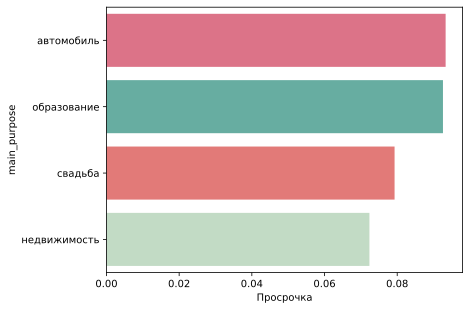

In [63]:
# Построение barplot на основе данных из DataFrame pivot_table_purpose
sns.barplot(data=pivot_table_purpose, y='main_purpose', x=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси X
plt.xlabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">

Проанализировав данные, можно сделать выводы о зависимости между целью, н которую берут займ и возвратом кредита в срок. В таблице представлено распределение заемщиков по цели займов и процент возврата и невозврата кредита для различных категорий заемщиков. (0 - возврат, 1 - не возврат).

Таблица:

| Debt | Main Purpose  | Return (%) | Not Return (%) |
|------|---------------|------------|----------------|
| 0    | автомобиль    | 90.6673    | 9.3327         |
| 1    | образование   | 90.7407    | 9.2593         |
| 2    | свадьба       | 92.0724    | 7.9276         |
| 3    | недвижимость  | 92.7643    | 7.2357         |

### Выводы:
1. **Общая тенденция**: Заемщики, которые берут кредит на свадьбу или недвижимость, имеют более высокий процент возврата кредита в срок по сравнению с теми, кто берет кредит на автомобиль или образование.

2. **Наибольший процент возврата кредита**:
   - Наибольший процент возврата кредита наблюдается у заемщиков, цель которых свадьба (92.07%) и недвижимость (92.76%).

3. **Наибольший процент невозврата кредита**:
   - Наибольший процент невозврата кредита у заемщиков, берущих кредит на автомобиль (9.33%) и образование (9.26%).

### Заключение:
Цель кредита влияет на вероятность возврата кредита в срок. Заемщики, берущие кредит на свадьбу или недвижимость, более склонны возвращать кредит в срок. В то время как кредиты на автомобиль и образование могут иметь немного больший риск невозврата.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='eighth'></a>Вопрос 5:
### Балансировка классов.
### Как она влияет на производительность модели?


[**Главное меню**](#menu)

In [64]:
train_features = ['children', 'days_employed', 'dob_years', 'education', 
                     'family_status', 'gender', 'income_type', 'total_income',
                     'years_employed', 'main_purpose', 'age_categories', 'total_income_categories']

target = 'debt'

In [65]:
# Подсчет количества значений в столбце 'target'
df[target].value_counts()

debt
0    19636
1     1733
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
**Несбалансированность данных в датасете:**
В наборе данных присутствует несбалансированность классов, что означает неравномерное представление классов. Это может привести к созданию модели с предвзятостью, которая будет плохо работать с новыми данными.

**Undersampling и Oversampling:**
- **Undersampling** подразумевает уменьшение количества примеров преобладающего класса до уровня меньшинства.
- **Oversampling** подразумевает увеличение количества примеров меньшинства путем дублирования или создания синтетических данных.

**Почему я не использую Undersampling:**
На примере моего датасета, я не использую метод undersampling по следующим причинам:

1. **Потеря ценных данных:** Уменьшение числа примеров ведущего класса может привести к потере важной информации, необходимой для обучения модели.
2. **Уменьшение размера датасета:** Меньший объем данных может не отражать всю сложность задачи, что приведет к недообучению модели.


Вместо этого я рассматриваю использование метода **resample**, который позволяет уравновесить классы без потери ценной информации.



In [66]:
# Выделение миноритарного и мажоритарного классов
minority = df[df['debt'] == 1]
majority = df[df['debt'] == 0]

# Oversampling миноритарного класса с помощью метода resample
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Объединение данных мажоритарного и oversampled миноритарного классов
oversampled_data = pd.concat([majority, minority_oversampled])


In [67]:
# Проверяем
oversampled_data['debt'].value_counts()

debt
0    19636
1    19636
Name: count, dtype: int64

In [68]:
# Сброс индексов в DataFrame oversampled_data
oversampled_data.reset_index(drop=True, inplace=True)

# Сброс индексов в исходном DataFrame df
df.reset_index(drop=True, inplace=True)


In [69]:
# Создание закодированных данных X_encoded_oversampled и y_oversampled из oversampled_data
X_encoded_oversampled = pd.get_dummies(oversampled_data[train_features])
y_oversampled = oversampled_data[target]

# Создание закодированных данных X_encoded и y из исходного DataFrame df
X_encoded = pd.get_dummies(df[train_features])
y = df[target]


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
    
##### **Сперва обучаем несколько алгоритмов классификации на несбалансированных данных.**

In [70]:
# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


In [71]:
# Создание модели DecisionTreeClassifier с заданным random_state
model = DecisionTreeClassifier(random_state=42)

# Обучение модели на обучающих данных X_train, y_train
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных X_test
y_pred = model.predict(X_test)

# Получение вероятностей принадлежности к классу 1 для расчета ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc_value = roc_auc_score(y_test, y_pred_proba)

# Вычисление точности модели
accuracy = accuracy_score(y_test, y_pred)

# Формирование отчета о классификации
report = classification_report(y_test, y_pred)

# Вывод результатов
print("Accuracy:", accuracy)
print("Area under the ROC curve:", roc_auc_value)
print("=" * 40)
print(report)


Accuracy: 0.8415223834035251
Area under the ROC curve: 0.5174794424624208
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5923
           1       0.10      0.14      0.11       488

    accuracy                           0.84      6411
   macro avg       0.51      0.52      0.51      6411
weighted avg       0.86      0.84      0.85      6411



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
##### **Метрика `roc_auc` показывет очень низкий результат, что говорит о плохой способности модели идентифицировать классы, теперь обучим алгоритмы на сбалансированных данных.**

In [72]:
# Разделяем сбалансироваанные данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded_oversampled, y_oversampled, test_size=0.3, random_state=42)

In [73]:
# Создание модели DecisionTreeClassifier с заданным random_state
model = DecisionTreeClassifier(random_state=42)

# Обучение модели на обучающих данных X_train, y_train
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных X_test
y_pred = model.predict(X_test)

# Получение вероятностей принадлежности к классу 1 для расчета ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc_value = roc_auc_score(y_test, y_pred_proba)

# Вычисление точности модели
accuracy = accuracy_score(y_test, y_pred)

# Формирование отчета о классификации
report = classification_report(y_test, y_pred)

# Вывод результатов
print("Accuracy:", accuracy)
print("Area under the ROC curve:", roc_auc_value)
print("=" * 40)
print(report)

Accuracy: 0.9478017314547615
Area under the ROC curve: 0.9478901881037112
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      5901
           1       0.91      1.00      0.95      5881

    accuracy                           0.95     11782
   macro avg       0.95      0.95      0.95     11782
weighted avg       0.95      0.95      0.95     11782



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    

### Вывод:
Данный метод балансировки классов обоснованно применяется для улучшения качества моделирования, так как позволяет достигать более высоких значений метрики `roc_auc`. Это свидетельствует о том, что модель с балансировкой классов лучше справляется с задачей идентификации классов, особенно в условиях несбалансированных данных. Таким образом, использование данного метода является целесообразным для повышения точности и уменьшения ошибок первого и второго рода.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='nineth'></a>Вопрос 6:
### Алгоритмы машинного обучения.
### Какой алгоритм лучше всего подходит для предсказания вероятности возврата кредита в срок?



[**Главное меню**](#menu)

In [74]:

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
}

# Определение словаря моделей с их параметрами
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='binary:logistic', random_state=42), 
    "CatBoost": CatBoostClassifier(loss_function='Logloss', random_state=42, verbose=0, iterations=600, learning_rate=0.1, max_depth=5),
    "LightGBM": LGBMClassifier(**params, random_state=42, verbosity=-1)
}

best_model = None
best_accuracy = float('-inf')

# Цикл обучения моделей и выбора лучшей модели по метрике точности
for name, model in models.items():
    model.fit(X_train, y_train)  # Обучение модели на обучающих данных
    
    y_pred = model.predict(X_test)  # Прогнозирование на тестовых данных
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Получение вероятностей класса 1 для ROC AUC
    roc_auc_value = roc_auc_score(y_test, y_pred_proba)  # Вычисление ROC AUC
    
    accuracy = accuracy_score(y_test, y_pred)  # Вычисление точности
    
    # Обновление лучшей модели, если текущая точность лучше предыдущей
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
    
    # Вывод результатов для текущей модели
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Area under the ROC curve:", roc_auc_value)
    print("=" * 40)

# Вывод лучшей модели и ее точности
print("Best Model:", type(best_model).__name__)
print("Best Accuracy:", best_accuracy)


Model: Logistic Regression
Accuracy: 0.5285180784247157
Area under the ROC curve: 0.5238726293253176
Model: Decision Tree
Accuracy: 0.9478017314547615
Area under the ROC curve: 0.9478901881037112
Model: Random Forest
Accuracy: 0.984382957053132
Area under the ROC curve: 0.9999647732908411
Model: Gradient Boosting
Accuracy: 0.6440332710914956
Area under the ROC curve: 0.6994417841675522
Model: XGBClassifier
Accuracy: 0.8627567475810558
Area under the ROC curve: 0.9331126196306967
Model: CatBoost
Accuracy: 0.8010524528942454
Area under the ROC curve: 0.8874782260757119
Model: LightGBM
Accuracy: 0.782549652011543
Area under the ROC curve: 0.8655173192799943
Best Model: RandomForestClassifier
Best Accuracy: 0.984382957053132


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
### Вывод:
Среди представленных моделей классификации, **Random Forest Classifier** выделяется как наилучший алгоритм, обеспечивая высочайшую точность (**Accuracy: 0.984382957053132**) и практически идеальное значение площади под ROC-кривой (**Area under the ROC curve: 0.9999647732908411**). Эти показатели свидетельствуют о выдающейся способности модели корректно классифицировать объекты, минимизируя ошибки как первого, так и второго рода. Таким образом, **Random Forest Classifier** является оптимальным выбором для данной задачи.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='tenth'></a>Вопрос 7:
### Значимые признаки.
### Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной 'debt'?


[**Главное меню**](#menu)

In [75]:
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]


auc_vals = []  # Список для хранения значений ROC AUC

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
}

# Выполнение Stratified K-Fold Cross-Validation с 5 фолдами
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X_encoded_oversampled, y_oversampled):
    X_train, X_test = X_encoded_oversampled.iloc[train_index], X_encoded_oversampled.iloc[test_index]
    y_train, y_test = y_oversampled[train_index], y_oversampled[test_index]

    # Создание пустого списка final_transformers для хранения трансформаторов
    final_transformers = []
    
    # Создание трансформаторов для каждого столбца X_train
    for col in X_train.columns:
        pipeline = Pipeline([
            ('selector', NumberSelector(key=col)),  # Выбор столбца с помощью NumberSelector
            ('scaler', RobustScaler())  # Масштабирование данных с помощью RobustScaler
        ])
        final_transformers.append((col, pipeline))
    
    # Создание объединения трансформаторов feats с использованием final_transformers
    feats = FeatureUnion(final_transformers)
    
    # Создание пайплайна feature_processing, который включает в себя объединение трансформаторов feats
    feature_processing = Pipeline([('feats', feats)])
    
    # Создание объединенного пайплайна с преобразованием признаков и моделью
    pipeline = Pipeline([
        ('features', feature_processing),
        ('classifier', best_model)  # Использование лучшей модели, определенной ранее
    ])
    
    # Обучение пайплайна на обучающих данных
    pipeline.fit(X_train, y_train)

    # Прогнозирование вероятностей класса 1 для ROC AUC
    y_pred_val_proba = pipeline.predict_proba(X_test)[:, 1]
        
    auc_val = roc_auc_score(y_test, y_pred_val_proba)  # Вычисление ROC AUC
    auc_vals.append(auc_val)  # Добавление значения ROC AUC в список auc_vals
    

# Вывод значений ROC AUC для каждого фолда и их среднего значения
print(f"AUCs: {auc_vals}")
print(f"Mean AUC: {np.mean(auc_vals)}")
print("----------------")


AUCs: [0.9999923177936236, 0.9999899515444023, 0.9999935154745743, 0.9999929318672858, 0.9991286094732821]
Mean AUC: 0.9998194652306335
----------------


In [76]:
# Прогнозирование на тестовых данных
y_pred = pipeline.predict(X_test) 

# Получение вероятностей класса 1 для ROC AUC
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Вычисление ROC AUC
roc_auc_value = roc_auc_score(y_test, y_pred_proba)  

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)  

print(f'Accuracy: {accuracy}')


Accuracy: 0.9865036923860453


In [77]:

# Вычисление precision-recall кривой и определение precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Вычисление F-score для каждого значения precision и recall
f_score = (2 * precision * recall) / (precision + recall)

# Определение индекса максимального значения F-score
ix = np.argmax(f_score)

# Применение порога thresholds[ix] к вероятностям y_pred_proba для получения бинарных предсказаний
binary_preds = np.where(y_pred_proba > thresholds[ix], 1, 0)

# Формирование отчета о классификации на основе бинарных предсказаний
report = classification_report(y_test, binary_preds)

# Вывод отчета
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3927
           1       1.00      1.00      1.00      3927

    accuracy                           1.00      7854
   macro avg       1.00      1.00      1.00      7854
weighted avg       1.00      1.00      1.00      7854



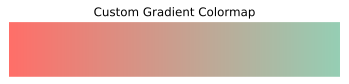

In [78]:
# Определение цветовых кодов в формате HEX
colors = ['#ff6f69', '#96ceb4']

# Преобразование цветовых кодов в формат RGB
colors_rgb = [tuple(int(color[i:i+2], 16) / 255.0 for i in (1, 3, 5)) for color in colors]

# Создание цветовой карты LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors_rgb)

# Создание градиента от 0 до 1
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# Отображение градиента с использованием созданной цветовой карты
plt.figure(figsize=(6, 1))
plt.imshow(gradient, aspect='auto', cmap=cmap)
plt.axis('off')
plt.title('Custom Gradient Colormap')
plt.show()


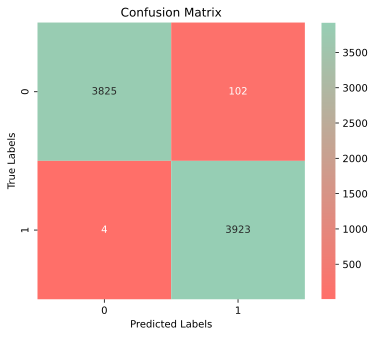

In [79]:

# Создание матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Построение тепловой карты матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [80]:

# Создание DataFrame feature_importances_df, содержащего важность признаков
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.round(pipeline.named_steps['classifier'].feature_importances_, 4)  # Импортирование признаков из модели
}).reset_index(drop=True)

# Сортировка DataFrame по важности признаков в порядке убывания
sorted_feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Выбор признаков, важность которых больше или равна 0.0030
resulting_features = sorted_feature_importances_df.loc[sorted_feature_importances_df['Importance'] >= 0.0030].reset_index(drop=True)

# Вывод отобранных признаков
print(resulting_features)


                                Feature  Importance
0                         days_employed      0.2149
1                          total_income      0.1898
2                             dob_years      0.1512
3                        age_categories      0.0602
4                              children      0.0461
5                        years_employed      0.0246
6         family_status_женат / замужем      0.0189
7             main_purpose_недвижимость      0.0185
8             total_income_categories_D      0.0166
9              main_purpose_образование      0.0159
10              main_purpose_автомобиль      0.0155
11                income_type_сотрудник      0.0152
12  family_status_не женат / не замужем      0.0146
13       family_status_гражданский брак      0.0142
14                     education_высшее      0.0141
15            total_income_categories_C      0.0140
16            total_income_categories_B      0.0134
17                income_type_компаньон      0.0132
18          

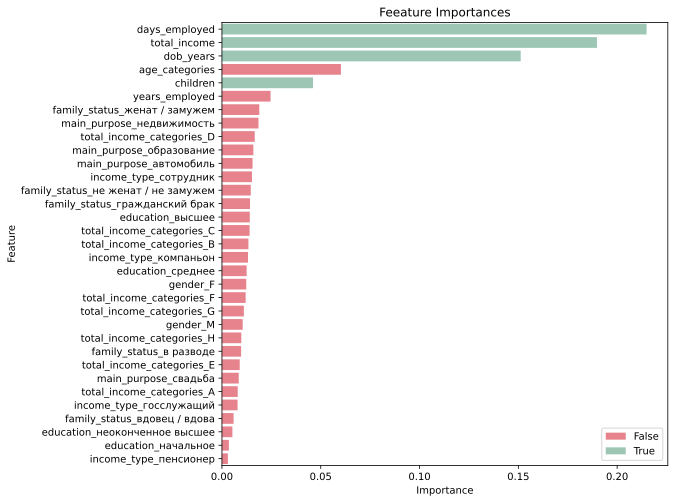

In [81]:
# Определение переменной hue на основе совпадения 'Feature' с базовыми признаками BASE_FEATURES
hue = resulting_features['Feature'].isin(BASE_FEATURES)

# Создание фигуры для графика с заданным размером
plt.figure(figsize=(8, 8))

# Построение столбчатой диаграммы с использованием данных из resulting_features
sns.barplot(data=resulting_features, y='Feature', x='Importance', palette=['#f67280', '#96ceb4'], hue=hue, dodge=False)

# Установка заголовка графика
plt.title('Feeature Importances')

# Установка подписи для оси X
plt.xlabel('Importance')

# Установка подписи для оси Y
plt.ylabel('Feature')

# Добавление легенды в нижнем правом углу графика
plt.legend(loc='lower right')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
### Вывод:
Наиболее значимый вклад в обучение модели классификации целевой переменной 'debt' вносят следующие признаки: **days_employed** (0.2149), **total_income** (0.1898), и **dob_years** (0.1512). Эти признаки имеют наибольшие показатели важности и, следовательно, оказывают наибольшее влияние на способность модели предсказывать вероятность возникновения долга. Признаки, связанные с возрастными категориями, количеством детей и стажем работы также вносят существенный вклад, но их значимость ниже по сравнению с тремя ведущими характеристиками.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
**Проверка алгоритма на несбалансированных тестовых данных**

In [82]:
# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42, stratify=y)

In [83]:

y_pred = pipeline.predict(X_test)  # Прогнозирование классов на тестовых данных

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Получение вероятностей класса 1 для вычисления ROC AUC
roc_auc_value = roc_auc_score(y_test, y_pred_proba)  # Вычисление ROC AUC

accuracy = accuracy_score(y_test, y_pred)  # Вычисление точности модели

# Вывод результатов
print("Accuracy:", accuracy)
print("Area under the ROC curve :", roc_auc_value)
print("="*40)


Accuracy: 0.995203556387459
Area under the ROC curve : 0.9999978873944501


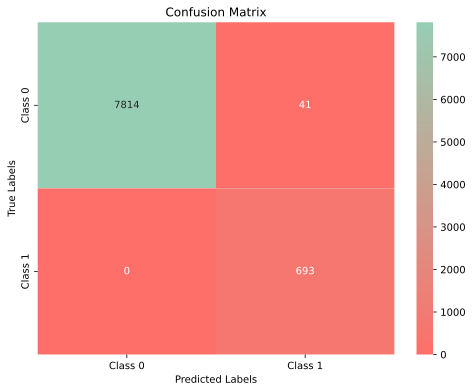

In [84]:
# Создание матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Построение тепловой карты матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='eleventh'></a>Вопрос 8:
### Снижение размерности.
### Как можно понизить размерность данных??

[**Главное меню**](#menu)

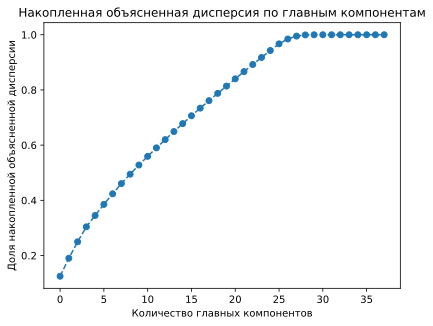

Количество компонентов для объяснения 95.0% дисперсии: 26
Accuracy: 0.9605330164657953
Area under the ROC curve : 0.9991377740655981


In [85]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_oversampled)

# Применение PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Визуализация накопленной объясненной дисперсии
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Накопленная объясненная дисперсия по главным компонентам')
plt.xlabel('Количество главных компонентов')
plt.ylabel('Доля накопленной объясненной дисперсии')
plt.show()

# Вывод количества компонентов для объяснения заданного процента дисперсии
variance_threshold = 0.95  # 95% дисперсии
components_needed = sum(pca.explained_variance_ratio_.cumsum() < variance_threshold) + 1
print(f"Количество компонентов для объяснения {variance_threshold*100}% дисперсии: {components_needed}")

# Применение PCA с необходимым количеством компонентов
pca = PCA(n_components=components_needed)
X_pca_reduced = pca.fit_transform(X_scaled)

# Обучение модели с использованием новых признаков
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_reduced, y_oversampled, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]
roc_auc_value = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Area under the ROC curve :", roc_auc_value)
print("="*40)

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='end'></a> **Общие выводы**
[**Главное меню**](#menu)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
## Общие выводы:

### По категориям дохода (total_income_categories):
- **Общая тенденция**: С увеличением категории дохода (от категории E до категории H) увеличивается вероятность возврата кредита в срок.
- **Наибольший процент возврата кредита**: Категории H (93.25%) и A (93.21%).
- **Наименьший процент возврата кредита**: Категория E (89.80%).

### По возрастным категориям (age_categories):
- **Общая тенденция**: С возрастом вероятность возврата кредита в срок увеличивается.
- **Наибольший процент возврата кредита**: В возрастной категории 9 (95.26%).
- **Наименьший процент возврата кредита**: В возрастной категории 1 (88.80%).

### По целям кредита (main_purpose):
- **Общая тенденция**: Кредиты на свадьбу и недвижимость имеют более высокий процент возврата кредита.
- **Наибольший процент возврата кредита**: На недвижимость (92.76%).
- **Наименьший процент возврата кредита**: На автомобиль (90.67%).

### По семейному положению (family_status):
- **Общая тенденция**: Замужние/женатые и вдовцы/вдовы имеют более высокий процент возврата кредита.
- **Наибольший процент возврата кредита**: Вдовцы/вдовы (93.50%).
- **Наименьший процент возврата кредита**: Неженатые/незамужние (90.23%).

### По уровню образования (education):
- **Общая тенденция**: Люди с высшим образованием имеют более высокий процент возврата кредита.
- **Наибольший процент возврата кредита**: Люди с ученой степенью (100%) и с высшим образованием (94.69%).
- **Наименьший процент возврата кредита**: Люди с начальным образованием (89.01%).

### По количеству детей (children):
- **Общая тенденция**: Заемщики без детей или с меньшим количеством детей имеют более высокий процент возврата кредита.
- **Наибольший процент возврата кредита**: Заемщики без детей (92.46%) и с 3 детьми (91.77%).
- **Заемщики с 5 детьми**: Показали 100% возврат кредита, но это может быть связано с малым размером выборки.

### Общие выводы:
- Семейное положение, уровень дохода, образование и цель кредита оказывают значительное влияние на вероятность возврата кредита в срок.
- Люди с более высоким доходом, старшего возраста, состоящие в браке, с высшим образованием и берущие кредит на недвижимость имеют более высокие шансы возврата кредита.
- Неженатые/незамужние заемщики, молодые люди, берущие кредит на автомобиль или образование, а также заемщики с начальным образованием или большим количеством детей могут иметь более высокий риск невозврата кредита.

### Важные признаки при обучении модели классификации:

| Признак                                       | Значимость |
|-----------------------------------------------|------------|
| Дни трудоустройства (days_employed)           | 0.2149     |
| Общий доход (total_income)                    | 0.1898     |
| Возраст (dob_years)                           | 0.1512     |
| Категории возраста (age_categories)           | 0.0602     |
| Количество детей (children)                   | 0.0461     |
| Семейное положение: женат / замужем           | 0.0189     |
| Цель кредита: недвижимость (main_purpose_недвижимость) | 0.0185     |





In [86]:
!pip freeze > requirements.txt

In [87]:
!python3 --version

Python 3.11.7


In [88]:
!which python

/Users/sergey/.pyenv/versions/3.11.7/bin/python
